# Machine learning experiment 1-2 -- Linear Classifier

In [1]:
# setup code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 16.0) # set default size of plots

%load_ext autoreload
%autoreload 2

# Data Loading and Preprocessing

In [2]:
# Load the raw australian_scale data.
filename = 'dataset/australian_scale'
X, y = load_svmlight_file(filename)

# Split the data into train and valuation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Train data shape:  (552, 14)
Train labels shape:  (552,)
Validation data shape:  (138, 14)
Validation labels shape:  (138,)


In [3]:
# preprocessing: substract the mean of each feature
# first: compute the mean of the features of train data

_mean = np.mean(X_train, axis = 0)
print(_mean)

[[ 0.31884058 -0.46476572 -0.67008152 -0.24637681 -0.01672242 -0.07382246
  -0.84769386  0.04710145 -0.16666667 -0.92953713 -0.05797101 -0.07971014
  -0.81589312 -0.97806283]]


In [4]:
# second: subtract the mean from train and X_val data

X_train -= _mean
X_val -= _mean

In [5]:
# third: append the bias dimension of ones

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

print('Train data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)

Train data shape:  (552, 15)
Validation data shape:  (138, 15)


In [6]:
# 

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

print('Train labels shape: ', y_train.shape)
print('Validation labels shape: ', y_val.shape)

Train labels shape:  (552, 1)
Validation labels shape:  (138, 1)


# Linear Classifier

svm_loss_naive(w, X_train, y_train, reg) return loss, grad

svm_loss_vectorized(w, X_train, y_train, reg) return loss, grad



In [7]:
def svm_loss_naive(W, X, y, reg):
    '''
    svm loss function, naive implementation (with loops).
    
    Inputs:
    - W: A numpy array of shape (D, 1) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N, 1) containing training labels.
    - reg: (float) regularization strength
    
    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    '''
    num_train = X.shape[0]
    
    loss = 0.0
    grad = np.zeros(W.shape) # initialize the gradient as zero
    
    # compute the loss and the gradient
    for i in range(num_train):
        _y = np.sum(X[i] * W)
        if 1 - y[i][0] * _y > 0:
            loss += 1 - y[i][0] * _y
            grad += - X[i].T * y[i][0]
    loss /= num_train
    grad /= num_train
    
    # Add regularization to the loss and gradient.
    loss += reg * 0.5 * np.sum(np.square(W))
    grad += reg * W
    
    return loss, grad

def svm_loss_vectorized(W, X, y, reg):
    '''
    svm loss function, vectorized implementation.
    
    Inputs and outputs are the same as regresser_loss_naive.
    '''
    _y = X.dot(W) # (N, 1)
    loss = np.mean(np.maximum(0, 1 - np.multiply(y, _y))) + reg * 0.5 * np.sum(np.square(W))
    
    coeff_mat = np.zeros(X.shape)
    coeff_mat = - np.array(np.multiply(X,y))
    coeff_mat[np.array((1 - np.multiply(y, _y) == 0)).reshape(-1)] = 0
    # coeff_mat[np.array((1 - np.multiply(y, _y) > 0)).reshape(-1)] = - np.array(np.multiply(X,y))[(1 - np.multiply(y, _y) > 0)]
    grad = np.mean(coeff_mat, axis = 0).reshape(-1,1) + reg * W
    
    return loss, grad

# Gradient Check

Performing a gradient check is as simple as comparing the analytic gradient to the numerical gradient. 


In [8]:
def eval_numerical_gradient(f, x, analytic_grad, h=1e-5):
    """
    Evaluate a numeric gradient for a function that accepts a numpy
    array and returns a numpy array.
    """
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
        
        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x)
        x[ix] = oldval - h
        neg = f(x)
        x[ix] = oldval

        grad_numerical = (pos - neg) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
        print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))
        
        it.iternext()

In [9]:
W = np.zeros((X_train.shape[1], 1))

# do the gradient check with regularization turned off
print('gradient check with regularization turned off')
loss, grad = svm_loss_naive(W, X_train, y_train, 0.0)
f = lambda w: svm_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = eval_numerical_gradient(f, W, grad)

# do the gradient check once again with regularization turned on
print('\ngradient check with regularization turned on')
loss, grad = svm_loss_vectorized(W, X_train, y_train, 0.5)
f = lambda w: svm_loss_vectorized(w, X_train, y_train, 0.5)[0]
grad_numerical = eval_numerical_gradient(f, W, grad)

gradient check with regularization turned off
numerical: 0.023472 analytic: 0.023472, relative error: 4.772544e-09
numerical: -0.057881 analytic: -0.057881, relative error: 4.056778e-10
numerical: -0.077897 analytic: -0.077897, relative error: 1.522481e-10
numerical: -0.075614 analytic: -0.075614, relative error: 2.163692e-10
numerical: -0.202850 analytic: -0.202850, relative error: 1.047663e-10
numerical: -0.115721 analytic: -0.115721, relative error: 4.283243e-11
numerical: -0.069076 analytic: -0.069076, relative error: 3.527363e-10
numerical: -0.694037 analytic: -0.694037, relative error: 1.785912e-10
numerical: -0.469203 analytic: -0.469203, relative error: 8.262734e-11
numerical: -0.059853 analytic: -0.059853, relative error: 3.239314e-09
numerical: -0.040170 analytic: -0.040170, relative error: 5.640039e-10
numerical: -0.030325 analytic: -0.030325, relative error: 1.096969e-09
numerical: 0.023116 analytic: 0.023116, relative error: 2.518038e-09
numerical: -0.019964 analytic: -0.0

# Performance Comparison

compare the performance of the naive implementation and vetorized implementation of gradient computing.



In [10]:
import time

tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_train, y_train, 0.5)
toc = time.time()
print('Naive implementation computed in %fs' % (toc - tic))


tic = time.time()
loss_vectorized, grad_vectorized = svm_loss_vectorized(W, X_train, y_train, 0.5)
toc = time.time()
print('Vectorized implementation computed in %fs' % (toc - tic))


print('difference of loss: %f' % (loss_naive - loss_vectorized))
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference of gradient: %f' % difference)

Naive implementation computed in 0.016720s
Vectorized implementation computed in 0.000477s
difference of loss: 0.000000
difference of gradient: 0.000000


# Gradient Descent

In [11]:
#
# reg: regularization strength.
# lr: learning rate for optimization.
# num_iters: number of steps to take when optimizing
reg = 0.5
lr = 0.001
num_iters=3000


W = np.zeros((X_train.shape[1], 1))
loss_train_history = []
loss_val_history = []
for i in range(num_iters):
    loss_train, grad = svm_loss_vectorized(W, X_train, y_train, reg)
    W -= lr * grad
    
    loss_val, _ = svm_loss_vectorized(W, X_val, y_val, reg)
    
    loss_train_history.append(loss_train)
    loss_val_history.append(loss_val)
    if i % 100 == 0:
        print('iteration %d / %d: train loss: %f\tvaluation loss: %f' 
              % (i, num_iters, loss_train, loss_val))

iteration 0 / 3000: train loss: 1.000000	valuation loss: 0.999172
iteration 100 / 3000: train loss: 0.924025	valuation loss: 0.920367
iteration 200 / 3000: train loss: 0.855282	valuation loss: 0.848927
iteration 300 / 3000: train loss: 0.793082	valuation loss: 0.784160
iteration 400 / 3000: train loss: 0.736802	valuation loss: 0.725435
iteration 500 / 3000: train loss: 0.685880	valuation loss: 0.672184
iteration 600 / 3000: train loss: 0.639804	valuation loss: 0.623891
iteration 700 / 3000: train loss: 0.598127	valuation loss: 0.580090
iteration 800 / 3000: train loss: 0.562461	valuation loss: 0.542193
iteration 900 / 3000: train loss: 0.538014	valuation loss: 0.515136
iteration 1000 / 3000: train loss: 0.529546	valuation loss: 0.502747
iteration 1100 / 3000: train loss: 0.535054	valuation loss: 0.502545
iteration 1200 / 3000: train loss: 0.548472	valuation loss: 0.510364
iteration 1300 / 3000: train loss: 0.566018	valuation loss: 0.522738
iteration 1400 / 3000: train loss: 0.585545	va

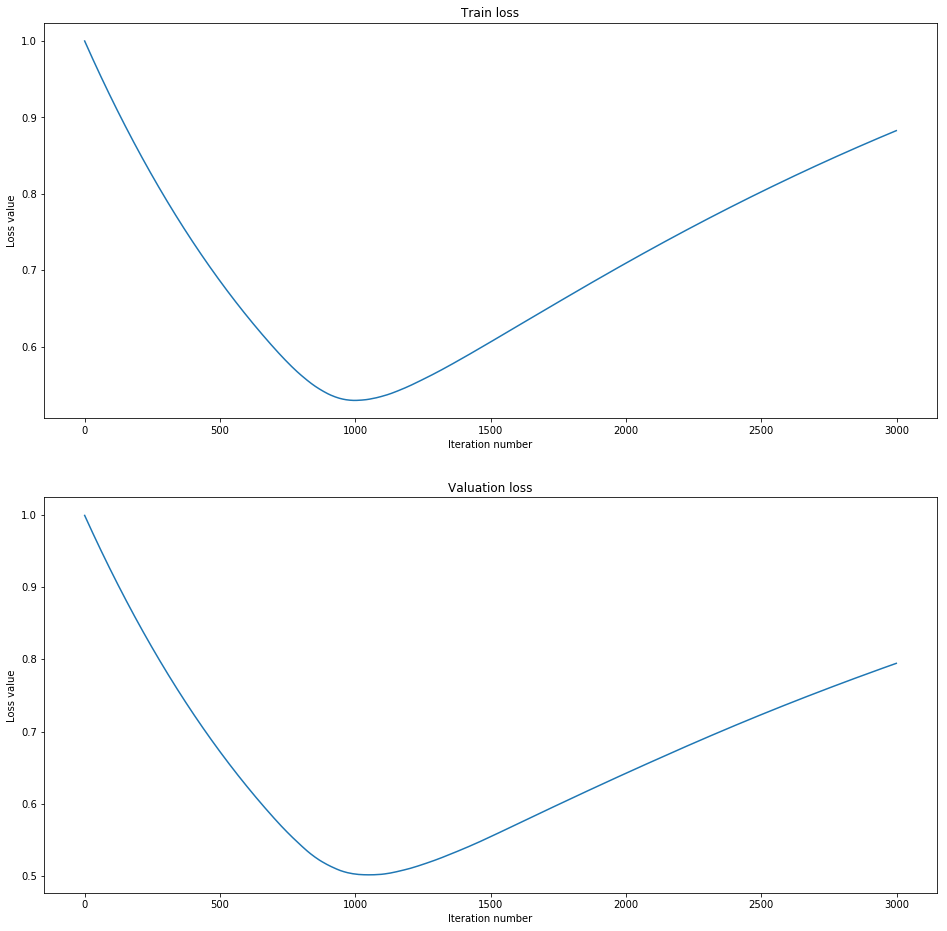

In [12]:
# plot the loss as a function of iteration number:

plt.subplot(2, 1, 1)
plt.title('Train loss')
plt.plot(loss_train_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

plt.subplot(2, 1, 2)
plt.title('Valuation loss')
plt.plot(loss_val_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

# Cross-Validation

Use the validation set to tune hyperparameters (regularization strength and learning rate).



In [13]:
# first run coarse search
# If the cost is 3 times greater than origin cost,break out early to avoid explosions

max_count = 100

results = {}
lowest_loss = float('inf')   # The lowest validation loss that we have seen so far.
best_W = None # The weight matrix that achieved thelowest validation loss.
best_setup = None # the best hyperparameter to get the best_W, (lr, reg, num_iters)

for i in range(max_count):
    W = np.zeros((X_train.shape[1], 1))
    reg = 10**np.random.uniform(-5, 5)
    lr = 10**np.random.uniform(-6, -3)
    
    loss_init, _ = svm_loss_vectorized(W, X_train, y_train, reg)
    for i in range(5000):
        loss, grad = svm_loss_vectorized(W, X_train, y_train, reg)
        W -= lr * grad
        if loss > 3 * loss_init:
            break
    loss_train, _ = svm_loss_vectorized(W, X_train, y_train, 0)
    loss_val, _ = svm_loss_vectorized(W, X_train, y_train, 0)
    
    results[lr, reg] = loss_train, loss_val
    if loss_val < lowest_loss:
        lowest_loss = loss_val
        best_W = W
        best_setup = (lr, reg, num_iters)


for lr, reg in sorted(results):
    loss_train, loss_val = results[(lr, reg)]
    print('lr %e, reg %e, train loss: %f, validation loss: %f' % (
                lr, reg, loss_train, loss_val))
    
print('lowest validation loss achieved: %f' % lowest_loss)

lr 1.079020e-06, reg 9.402176e+00, train loss: 0.995801, validation loss: 0.995801
lr 1.173458e-06, reg 1.964606e+02, train loss: 0.997220, validation loss: 0.997220
lr 1.584413e-06, reg 1.376289e-03, train loss: 0.993677, validation loss: 0.993677
lr 1.666096e-06, reg 1.495617e-04, train loss: 0.993351, validation loss: 0.993351
lr 1.802771e-06, reg 5.797506e+03, train loss: 0.999862, validation loss: 0.999862
lr 2.338562e-06, reg 4.558424e+03, train loss: 0.999825, validation loss: 0.999825
lr 2.368756e-06, reg 2.684496e+01, train loss: 0.991902, validation loss: 0.991902
lr 2.718536e-06, reg 8.790986e-04, train loss: 0.989151, validation loss: 0.989151
lr 3.018276e-06, reg 2.422427e-03, train loss: 0.987955, validation loss: 0.987955
lr 3.135712e-06, reg 5.344570e-05, train loss: 0.987486, validation loss: 0.987486
lr 3.436587e-06, reg 3.905619e+04, train loss: 0.999980, validation loss: 0.999980
lr 3.586462e-06, reg 1.722112e+00, train loss: 0.985905, validation loss: 0.985905
lr 3

In [14]:
for lr, reg in results:
    loss_train, loss_val = results[(lr, reg)]
    print('lr %e, reg %e, train loss: %f, validation loss: %f' % (
                lr, reg, loss_train, loss_val))
    
print('lowest validation loss achieved: %f' % lowest_loss)

lr 9.355890e-05, reg 2.887469e-01, train loss: 0.650730, validation loss: 0.650730
lr 2.738249e-04, reg 3.753999e-02, train loss: 0.392761, validation loss: 0.392761
lr 3.879788e-06, reg 6.160435e+02, train loss: 0.998704, validation loss: 0.998704
lr 3.018276e-06, reg 2.422427e-03, train loss: 0.987955, validation loss: 0.987955
lr 8.703587e-05, reg 2.031443e+02, train loss: 0.996071, validation loss: 0.996071
lr 1.614724e-05, reg 9.179308e+01, train loss: 0.991310, validation loss: 0.991310
lr 2.295788e-05, reg 9.913724e-02, train loss: 0.908897, validation loss: 0.908897
lr 1.313110e-05, reg 1.018335e+02, train loss: 0.992172, validation loss: 0.992172
lr 2.847427e-05, reg 9.057505e+00, train loss: 0.936142, validation loss: 0.936142
lr 4.369510e-05, reg 8.182112e-01, train loss: 0.840312, validation loss: 0.840312
lr 2.539217e-04, reg 1.830060e-01, train loss: 0.385778, validation loss: 0.385778
lr 1.093166e-05, reg 1.963807e+04, train loss: 0.999959, validation loss: 0.999959
lr 1

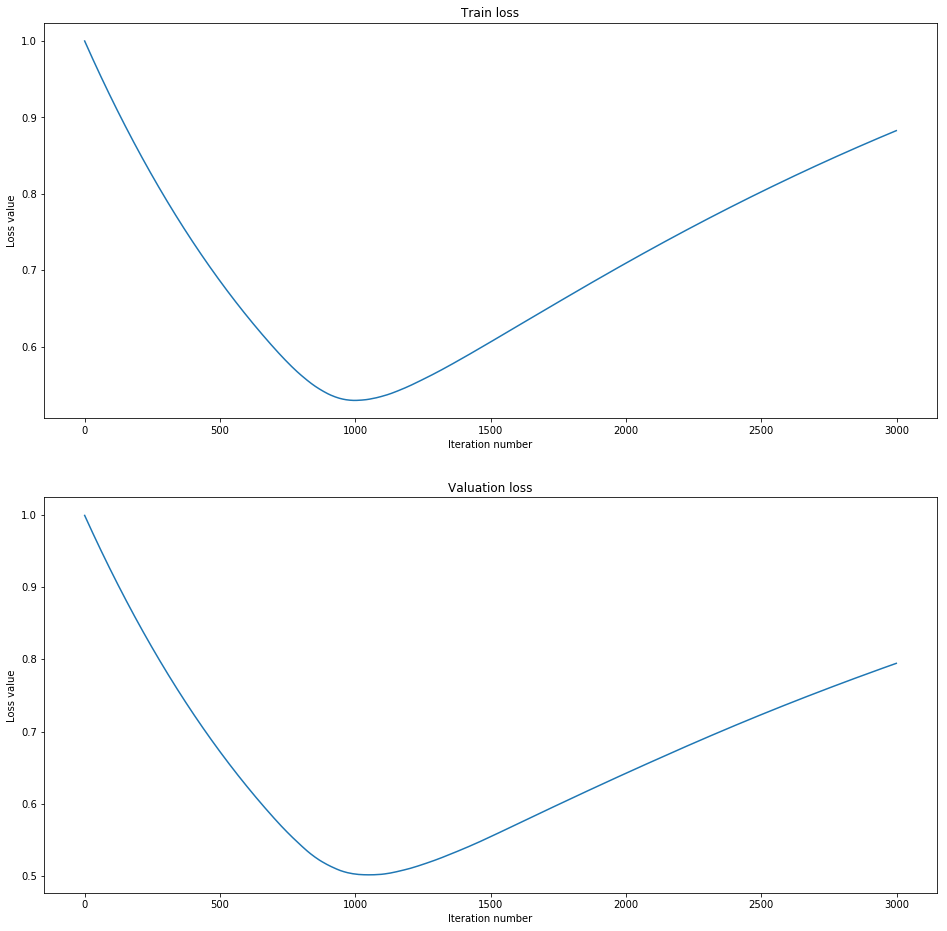

In [15]:
# plot the loss as a function of iteration number:

plt.subplot(2, 1, 1)
plt.title('Train loss')
plt.plot(loss_train_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

plt.subplot(2, 1, 2)
plt.title('Valuation loss')
plt.plot(loss_val_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

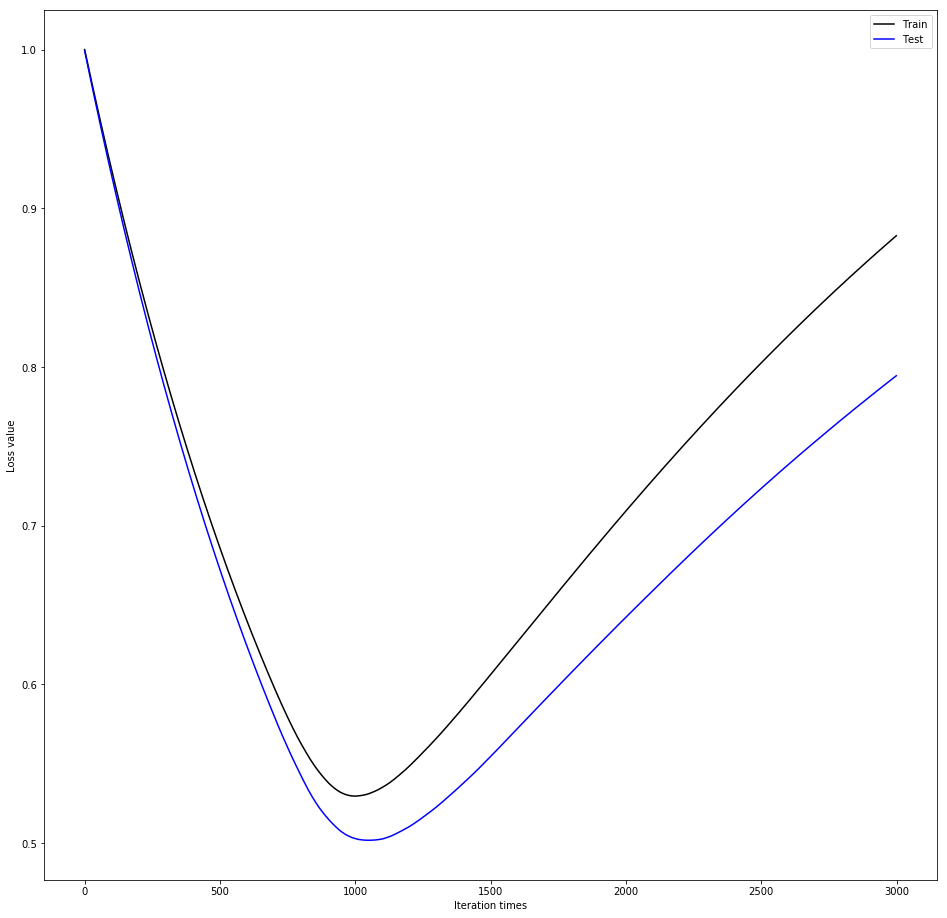

In [23]:
plt.plot(loss_train_history,'black',label='Train')
plt.plot(loss_val_history,'blue',label='Test')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()

In [26]:

t = X_val.dot(best_W) > 0
count = 0
for i in range(X_val.shape[0]):
    if t[i][0] == False and y_val[i]== -1:
        count = count + 1
    elif t[i][0] == True and y_val[i]== 1:
        count = count + 1

print(count / y_val.shape[0])
print(count)
print(y_val.shape[0])

0.9347826086956522
129
138


In [21]:
t = X_train.dot(best_W) > 0
count = 0
for i in range(X_train.shape[0]):
    if t[i][0] == False and y_train[i]== -1:
        count = count + 1
    elif t[i][0] == True and y_train[i]== 1:
        count = count + 1

count / X_train.shape[0]

0.855072463768116